In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
from tensorflow.keras import Sequential, layers, datasets, models

### Plot rewards for literal vs pragmatic agents and different negative sampling strategies

In [4]:
def plot_reward(n_epochs=20, source='results/'):

    paths1 = [source + 'literal_no_negative_sampling/',
              source + 'pragmatic_no_negative_sampling_alpha_5.0/',
              source + 'pragmatic_no_negative_sampling_alpha_10.0/',
              source + 'pragmatic_no_negative_sampling_alpha_15.0/'
             ]

    paths2 = [source + 'pragmatic_no_negative_sampling_alpha_5.0/',
              source + 'pragmatic_negative_sampling_words_alpha_5.0/',
              source + 'pragmatic_negative_sampling_objects_alpha_5.0/',
              source + 'pragmatic_negative_sampling_both_alpha_5.0/'
             ]

    errors = [15, 17, 14, 16]

    for plot in [0, 1]:

        plt.figure(figsize=(8, 6))

        paths = [paths1, paths2][plot]
        title = ['performance literal vs pragmatic', r'performance negative sampling ($\alpha=5$)'][plot]
        legend = [['literal', r'pragmatic: $\alpha=5$', r'pragmatic: $\alpha=10$', r'pragmatic: $\alpha=15$'],
                  ['none', 'words', 'objects', 'both']][plot]
        for i in range(len(paths)):
            path = paths[i]
            rewards = []
            for run in range(25):
                rewards.append(np.load(path + 'run' + str(run) + '/rewards.npy'))
            mean = np.mean(rewards, axis=0)
            std = np.std(rewards, axis=0)
            dash_tmp = [(5,2),(5,3),(5,2),(5,3)][i]
            plt.errorbar(np.arange(n_epochs), mean[0:n_epochs], yerr=std[0:n_epochs], errorevery=errors[i], linestyle='dashed',
                         dashes=dash_tmp, linewidth=3)
        plt.xlim([-1, 21])
        plt.ylim([0.78, 1.01])
        plt.ylabel('reward', fontsize=20)
        plt.xlabel('epoch', fontsize=20)
        plt.xticks(ticks=[0, 10, 20], labels=[0, 10, 20], fontsize=15)
        plt.yticks(ticks=[0.8, 0.9, 1.0], labels=[0.8, 0.9, 1.0], fontsize=15)
        plt.title(title, fontsize=25)
        plt.legend(legend, fontsize=18)

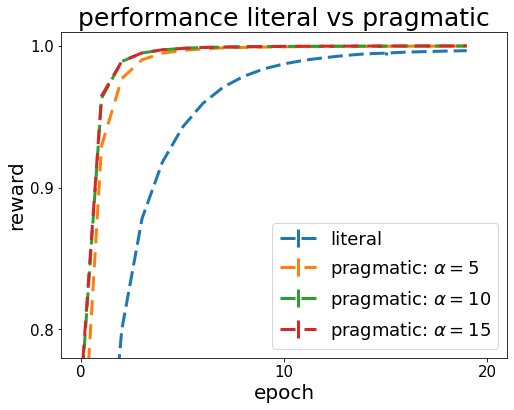

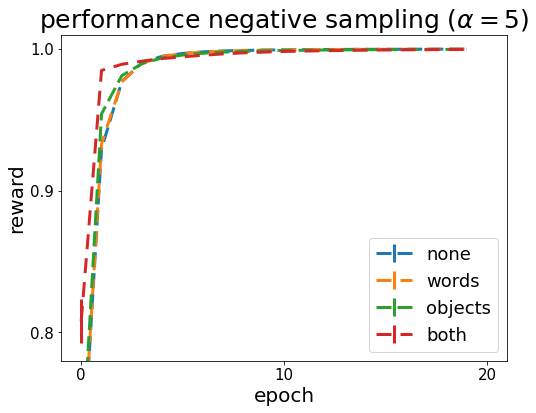

In [5]:
plot_reward()

### Plot ME bias for literal vs pragmatic agents with different optimality

In [6]:
def plot_ME_bias_literal_pragmatic(lim=None, n_epochs=100, source='results/'):

    plt.figure(figsize=(8, 6))

    paths = [source + 'literal_no_negative_sampling/',
             source + 'pragmatic_no_negative_sampling_alpha_5.0/',
             source + 'pragmatic_no_negative_sampling_alpha_10.0/',
             source + 'pragmatic_no_negative_sampling_alpha_15.0/'
            ]
    
    #paths = ['results_no_recurrence/linear_embedding_only/pragmatic_no_negative_sampling_alpha1/']

    for i in range(len(paths)):
        
        path = paths[i]
        errors = [15, 17, 14, 16][i]
        if n_epochs == 10: 
            errors = [1,2,3,4][i]
        ME = []
        for run in range(25):
            try:
                ME.append(np.load(path + 'run' + str(run) + '/ME.npy'))
            except: 
                continue
        mean = np.mean(ME, axis=0)
        std = np.std(ME, axis=0)
        plt.errorbar(np.arange(n_epochs), mean[0:n_epochs], yerr=std[0:n_epochs], errorevery=errors, linewidth=2)
        plt.title('ME bias literal vs pragmatic', fontsize=25)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('epoch', fontsize=20)
        plt.ylabel('correct selection probability', fontsize=20)
        if lim is not None:
            plt.ylim(lim)    
    
    plt.legend(['literal', r'pragmatic: $\alpha=5$', r'pragmatic: $\alpha=10$', r'pragmatic: $\alpha=15$'],
               fontsize=18, loc=4)

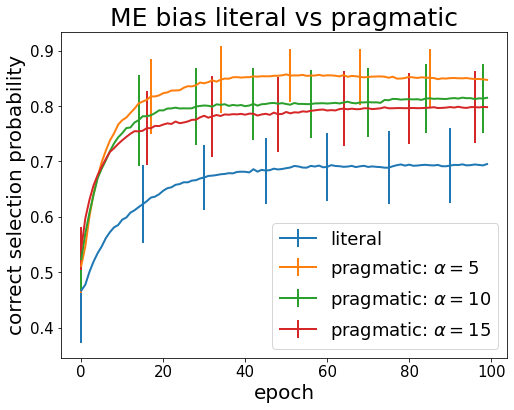

In [7]:
plot_ME_bias_literal_pragmatic(source='results/')

### Plot ME bias for literal vs pragmatic agents with different optimality

In [8]:
def plot_ME_bias_negative_sampling(lim=None, n_epochs=100, source='results/', alpha=5.0, n_runs=25):
    plt.figure(figsize=(8, 6))

    paths = [source + 'pragmatic_no_negative_sampling_alpha_' + str(alpha) + '/',
             source + 'pragmatic_negative_sampling_words_alpha_' + str(alpha) + '/',
             source + 'pragmatic_negative_sampling_objects_alpha_' + str(alpha) + '/',
             source + 'pragmatic_negative_sampling_both_alpha_' + str(alpha) + '/'
            ]

    for i in range(len(paths)):
        path = paths[i]
        errors = [15, 17, 14, 16][i]
        if n_epochs == 10: 
            errors = [1,2,2,3][i]
        rewards = []
        losses = []
        ME = []
        for run in range(n_runs):
            try:
                rewards.append(np.load(path + 'run' + str(run) + '/rewards.npy'))
                losses.append(np.load(path + 'run' + str(run) + '/losses.npy'))
                ME.append(np.load(path + 'run' + str(run) + '/ME.npy'))
            except: 
                print(i, run)
                continue
        mean = np.mean(ME, axis=0)
        std = np.std(ME, axis=0)
        plt.errorbar(np.arange(n_epochs), mean[0:n_epochs], yerr=std[0:n_epochs], errorevery=errors, linewidth=2)
        plt.title(r'ME bias negative sampling ($\alpha$=5)', fontsize=25)
        plt.xlabel('epoch', fontsize=20)
        plt.ylabel('correct selection probability', fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if lim is not None:
            plt.ylim(lim)
    plt.legend(['none', 'words', 'objects', 'both']
               , fontsize=18, loc=4)


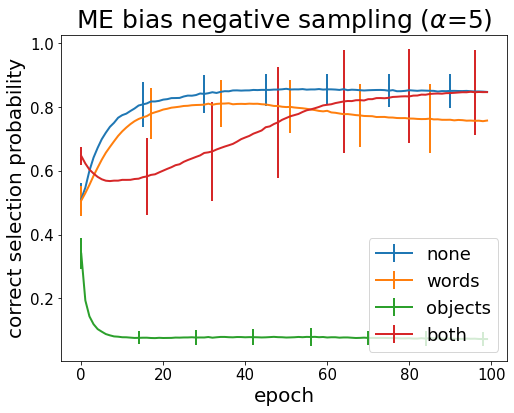

In [9]:
plot_ME_bias_negative_sampling(source='results/')

### Plot lexicon examples for the literal agent

In [2]:
def plot_lexicon_examples_literal(source='results/'):
    (train_images, train_labels_orig), _ = datasets.mnist.load_data()
    train_images = train_images / 255.0
    train_images = train_images.reshape(60000, 28, 28, 1)
    mnist_classifier = models.load_model('mnist_classifier/model.06-0.04.h5')
    feature_extraction_model = tf.keras.Model(inputs=mnist_classifier.input,
                                              outputs=mnist_classifier.get_layer('dense').output)
    train_images = np.array(feature_extraction_model(train_images))

    VOCAB_SIZE = 20
    activation = 'sigmoid'

    message_encoder = Sequential(
        [layers.Embedding(input_dim=VOCAB_SIZE, output_dim=32, input_length=1), 
         layers.Flatten(),
         layers.Dense(32, activation=activation)], 
        name='message_encoder'
    )
        
    state_encoder = Sequential(
            [layers.Dense(32, activation=activation)], 
            name='state_encoder'
    )
    init = state_encoder(tf.ones((1, 64)))
    
    all_messages = np.zeros((VOCAB_SIZE, 1))
    for i in range(VOCAB_SIZE):
        all_messages[i] = i 

    path = source + 'literal_no_negative_sampling/'
    
    objects_sorted = []
    for o in range(10): 
        objects_sorted.append(train_images[train_labels_orig==o])
    
    fig = plt.figure(figsize=(13, 3.3))
    
    for t, test in enumerate(range(3)):
        plt.subplot(1, 3, t + 1)

        state_enc_weights = np.load(path + 'run' + str(test) + '/state_encoder_weights.npy', allow_pickle=True)
        message_enc_weights = np.load(path + 'run' + str(test) + '/message_encoder_weights.npy', allow_pickle=True)

        message_encoder.set_weights(message_enc_weights)
        state_encoder.set_weights(state_enc_weights)

        state_encodings_sorted = []
        for o in range(10): 
            state_encodings_sorted.append(state_encoder(np.array(objects_sorted[o])))
        message_encodings = message_encoder(all_messages)
        lexicon = np.zeros((10, 20))

        for i in range(10):
            for j in range(20):
                lexicon[i, j] = tf.reduce_mean(np.matmul(state_encodings_sorted[i], message_encodings[j]))

        ax = plt.gca()
        im = ax.imshow(lexicon)
        plt.title('example ' + str(t+1), fontsize=15)
        plt.xlabel('words', fontsize=15)
        plt.ylabel('objects', fontsize=15)
        plt.xticks(ticks=np.arange(0, 20, 2), labels=np.arange(0, 20, 2), fontsize=9)
        plt.yticks(ticks=np.arange(10), labels=np.arange(0, 10), fontsize=9)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cb = plt.colorbar(im, cax=cax)
        cb.set_label(label='dot product', size='x-large')
        cb.ax.tick_params(labelsize=9)

    plt.suptitle('literal agent lexicon\n \n \n', fontsize=15)
    fig.tight_layout()

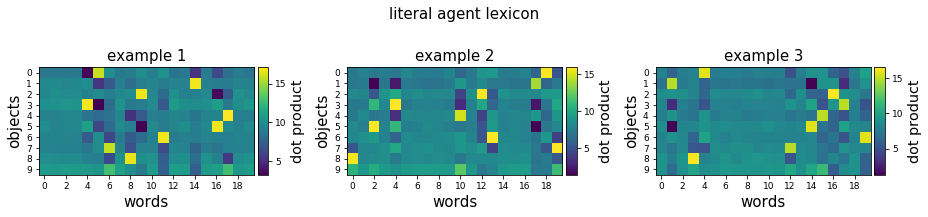

In [3]:
plot_lexicon_examples_literal()

### Plot lexicon examples for the pragmatic agent with different sampling stragies

In [4]:
def plot_lexicon_examples_pragmatic(source='results/'):
    (train_images, train_labels_orig), _ = datasets.mnist.load_data()
    train_images = train_images / 255.0
    train_images = train_images.reshape(60000, 28, 28, 1)
    mnist_classifier = models.load_model('mnist_classifier/model.06-0.04.h5')
    feature_extraction_model = tf.keras.Model(inputs=mnist_classifier.input,
                                              outputs=mnist_classifier.get_layer('dense').output)
    train_images = np.array(feature_extraction_model(train_images))

    VOCAB_SIZE = 20
    activation = 'sigmoid'

    message_encoder = Sequential(
        [layers.Embedding(input_dim=VOCAB_SIZE, output_dim=32, input_length=1), 
         layers.Flatten(),
         layers.Dense(32, activation=activation)], 
        name='message_encoder'
    )
        
    state_encoder = Sequential(
            [layers.Dense(32, activation=activation)], 
            name='state_encoder'
    )
    init = state_encoder(tf.ones((1, 64)))
    
    all_messages = np.zeros((VOCAB_SIZE, 1))
    for i in range(VOCAB_SIZE):
        all_messages[i] = i 

    paths = [source + 'pragmatic_no_negative_sampling_alpha_5.0/',
             source + 'pragmatic_negative_sampling_words_alpha_5.0/',
             source + 'pragmatic_negative_sampling_objects_alpha_5.0/',
             source + 'pragmatic_negative_sampling_both_alpha_5.0/']
    
    objects_sorted = []
    for o in range(10): 
        objects_sorted.append(train_images[train_labels_orig==o])

    for t, test in enumerate(range(3)):
        if t == 0:
            fig = plt.figure(figsize=(20, 4))
        else:
            fig = plt.figure(figsize=(20, 3))

        for k in range(4):

            path = paths[k]

            state_enc_weights = np.load(path + 'run' + str(test) + '/state_encoder_weights.npy', allow_pickle=True)
            message_enc_weights = np.load(path + 'run' + str(test) + '/message_encoder_weights.npy', allow_pickle=True)

            message_encoder.set_weights(message_enc_weights)
            state_encoder.set_weights(state_enc_weights)

            plt.subplot(1, 4, k + 1)
            
            state_encodings_sorted = []
            for o in range(10): 
                state_encodings_sorted.append(state_encoder(np.array(objects_sorted[o])))
                
            message_encodings = message_encoder(all_messages)
            lexicon = np.zeros((10, 20))

            for i in range(10):
                for j in range(20):
                    lexicon[i, j] = tf.reduce_mean(np.matmul(state_encodings_sorted[i], message_encodings[j]))

            ax = plt.gca()
            im = ax.imshow(lexicon)
            plt.title(['none', 'words', 'objects', 'both'][k], fontsize=20)
            plt.xlabel('words', fontsize=20)
            plt.ylabel('objects', fontsize=20)
            plt.xticks(ticks=np.arange(0, 20, 2), labels=np.arange(0, 20, 2), fontsize=10)
            plt.yticks(ticks=np.arange(10), labels=np.arange(0, 10), fontsize=10)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cb = plt.colorbar(im, cax=cax)
            cb.set_label(label='dot product', size='xx-large')
            cb.ax.tick_params(labelsize=10)

        if t == 0:
            plt.suptitle(
                'pragmatic agent lexicon \n \n examples ' + str(t + 1),
                fontsize=20)
        else:
            plt.suptitle('examples ' + str(t + 1), fontsize=20)
        fig.tight_layout()

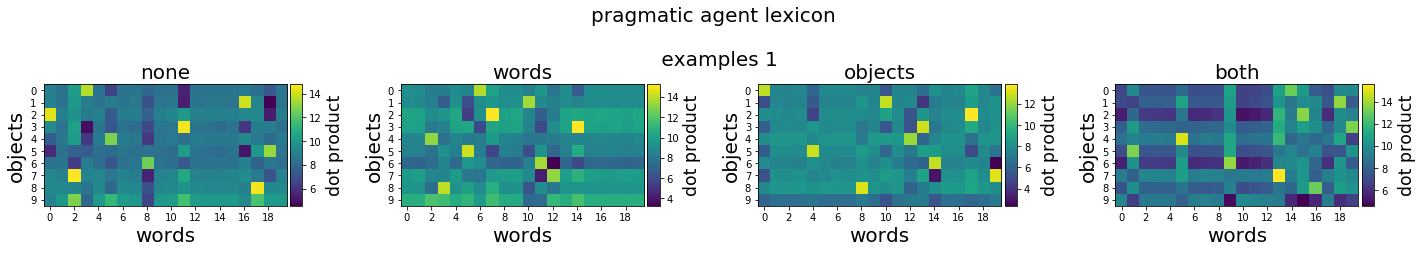

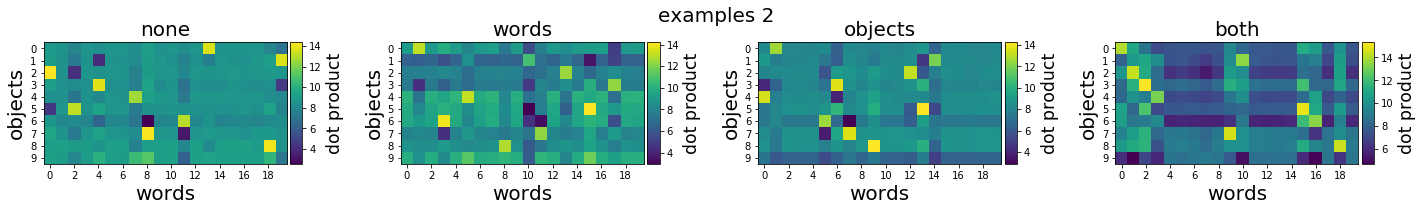

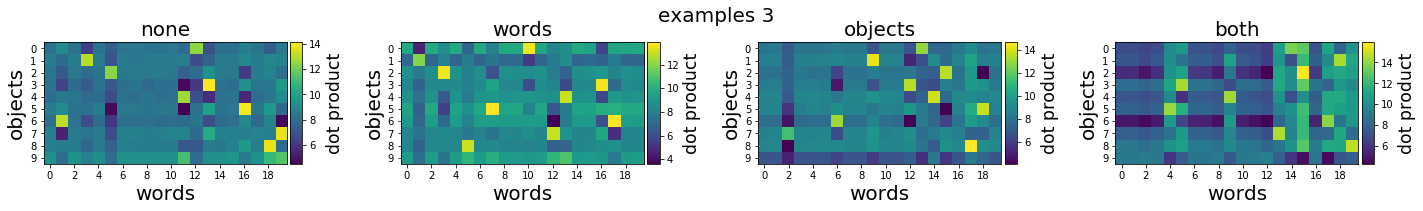

In [5]:
plot_lexicon_examples_pragmatic()

## alternative parameters

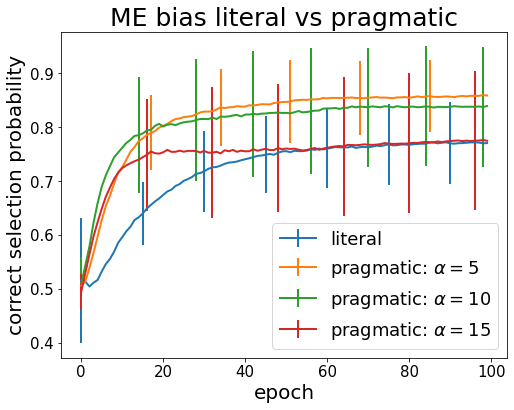

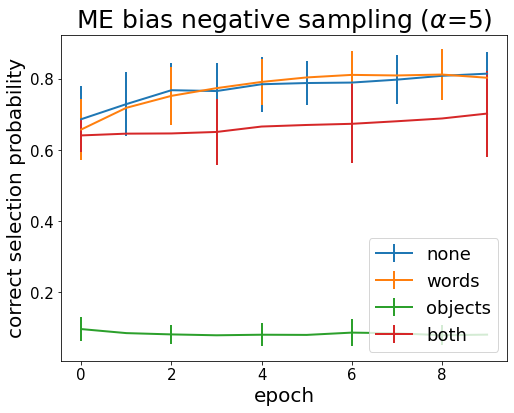

In [13]:
### alternative parameters: embedding layer dimension 8, joint embedding space dimension 32

plot_ME_bias_literal_pragmatic(source='results/alternative_parameters/embeddim8_sigmoiddim32/')
plot_ME_bias_negative_sampling(source='results/alternative_parameters/learningrate0.001/', n_epochs=10)

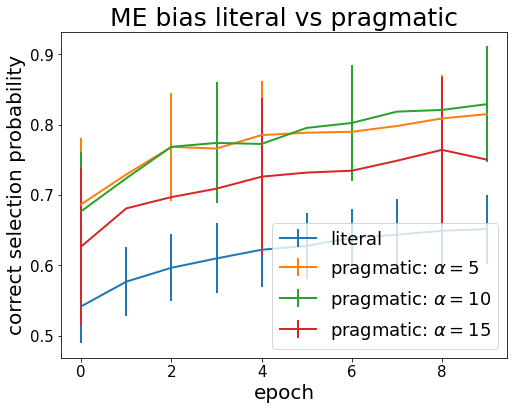

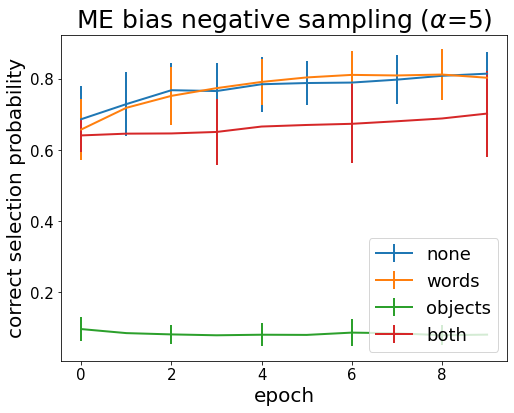

In [14]:
### alternative parameters: embedding layer dimension 32, joint embedding space dimension 32, learning rate 0.001

plot_ME_bias_literal_pragmatic(source='results/alternative_parameters/learningrate0.001/', n_epochs=10)
plot_ME_bias_negative_sampling(source='results/alternative_parameters/learningrate0.001/', n_epochs=10)

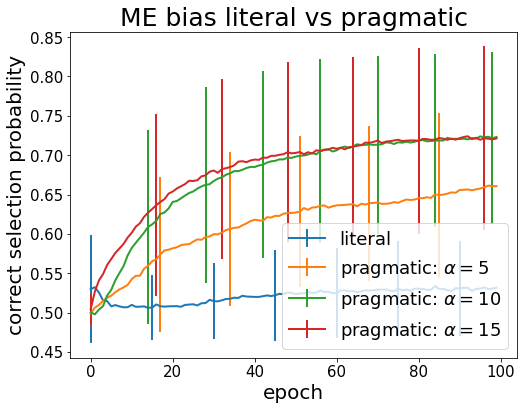

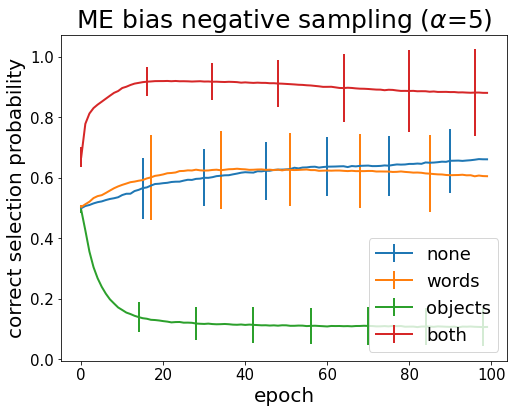

In [15]:
### alternative parameters: embedding layer dimension 8, joint embedding space dimension 8

plot_ME_bias_literal_pragmatic(source='results/alternative_parameters/embeddim8_sigmoiddim8/')
plot_ME_bias_negative_sampling(source='results/alternative_parameters/embeddim8_sigmoiddim8/')